In [2]:
import pandas as pd 
from joblib import load, dump 

In [3]:
# Read the scraped Airbnb Data
airbnb = pd.read_csv('airbnb_hotels.csv')
airbnb.drop(airbnb.columns[0], axis=1, inplace=True)

In [4]:
# Read the scraped Tripadvisor Data
tripadvisor = pd.read_csv('tripadvisor_hotels.csv')
tripadvisor.drop(tripadvisor.columns[0], axis=1, inplace=True)

In [56]:
airbnb.describe()

,Price,Primary_Rating,Location_Rating,Cleanliness_Rating,Value_Rating,Communication_Rating,Accuracy_Rating,Checkin_Rating,Num_Reviews
count,742.000000,742.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,742.000000
mean,122.702156,4.324245,4.703367,4.749048,4.755783,4.740849,4.777745,4.653148,85.966307
std,148.194101,1.299332,0.288139,0.299723,0.289363,0.264770,0.269031,0.350368,98.125248
min,24.000000,0.000000,3.600000,3.800000,3.900000,3.600000,4.100000,3.400000,0.000000
25%,60.000000,4.510000,4.600000,4.600000,4.700000,4.700000,4.700000,4.500000,13.000000
50%,83.500000,4.745000,4.800000,4.900000,4.900000,4.800000,4.900000,4.800000,42.000000
75%,123.000000,4.890000,4.900000,5.000000,5.000000,4.900000,5.000000,4.900000,138.000000
max,885.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,384.000000


In [55]:
tripadvisor.describe()

,Price,Primary_Rating,Location_Rating,Cleanliness_Rating,Service_Rating,Value_Rating,Num_Reviews
count,755.000000,755.000000,633.000000,628.00000,613.000000,587.000000,755.000000
mean,82.850331,3.333113,4.346761,4.08121,3.969005,3.908859,1143.872848
std,122.564973,1.522585,0.751724,0.89019,0.824374,0.720108,2178.584006
min,0.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000
25%,0.000000,3.000000,4.000000,4.00000,3.500000,3.500000,4.000000
50%,68.000000,4.000000,4.500000,4.50000,4.000000,4.000000,184.000000
75%,116.000000,4.500000,5.000000,4.50000,4.500000,4.500000,1449.500000
max,745.000000,5.000000,5.000000,5.00000,5.000000,5.000000,25475.000000


# Combine DataFrames

1. Find common columns
2. Omit the rest
3. If an address is present, use it, otherwise use the neighborhood
4. Add a column indicating if the listing is a hotel or airbnb

In [52]:
combined_df = pd.DataFrame(columns=['Airbnb_Or_Hotel',
                            'Listing_Name', 
                            'Price', 
                            'Primary_Rating', 
                            'Location_Rating', 
                            'Cleanliness_Rating',
                            'Value_Rating',
                            'Num_Reviews',
                            'Address',
                            'Neighborhood',
                            'Amenities',
                            'Lat',
                            'Long'])
for i, row in tripadvisor.iterrows():
    combined_df = combined_df.append({
        'Airbnb_Or_Hotel': 'Hotel',
        'Listing_Name': row['Hotel_Name'],
        'Price': row['Price'],
        'Primary_Rating': row['Primary_Rating'],
        'Location_Rating': row['Location_Rating'],
        'Cleanliness_Rating': row['Cleanliness_Rating'],
        'Value_Rating': row['Value_Rating'],
        'Num_Reviews': row['Num_Reviews'],
        'Address': row['Address'],
        'Amenities': row['Amenities']
    }, ignore_index=True)
    
for i, row in airbnb.iterrows():
    combined_df = combined_df.append({
        'Airbnb_Or_Hotel': 'Airbnb',
        'Listing_Name': row['Airbnb_Name'],
        'Price': row['Price'],
        'Primary_Rating': row['Primary_Rating'],
        'Location_Rating': row['Location_Rating'],
        'Cleanliness_Rating': row['Cleanliness_Rating'],
        'Value_Rating': row['Value_Rating'],
        'Num_Reviews': row['Num_Reviews'],
        'Neighborhood': row['Neighborhood'],
        'Amenities': row['Amenities']
    }, ignore_index=True)

# Save the raw data

In [60]:
combined_df.tail()
dump(combined_df, 'raw_combined_df.pkl', compress=True)

['raw_combined_df.pkl']

# Remove observations that do not have a price

In [61]:
combined_df = load('raw_combined_df.pkl')
# Remove listings that do not have a price, neighborhood, or address
no_price_removed = combined_df[combined_df['Price'] != 0]
no_price_removed.head()

,Airbnb_Or_Hotel,Listing_Name,Price,Primary_Rating,Location_Rating,Cleanliness_Rating,Value_Rating,Num_Reviews,Address,Neighborhood,Amenities,Lat,Long
0,Hotel,The Hotel At Times Square,68,4.0,5.0,4.0,4.0,4140,"59 West 46th Street, New York City, NY 10036-4120",NaN,"['Paid public parking nearby', 'Free High Spee...",NaN,NaN
1,Hotel,Hotel Edison,75,4.0,5.0,4.0,4.0,13283,228 West 47th Street Between Broadway and 8 Av...,NaN,"['Paid private parking nearby', 'Wifi', 'Fitne...",NaN,NaN
2,Hotel,Park Lane Hotel,130,4.0,5.0,4.0,4.0,9391,36 Central Park South 59th Street Between 5th ...,NaN,"['Paid public parking nearby', 'Wifi', 'Fitnes...",NaN,NaN
3,Hotel,Crowne Plaza Times Square Manhattan,89,4.0,5.0,4.5,4.0,11937,"1605 Broadway Between 48th and 49th Street, Ne...",NaN,"['Valet parking', 'Free internet', 'Fitness Ce...",NaN,NaN
4,Hotel,The New Yorker A Wyndham Hotel,80,4.0,4.5,4.0,4.0,14918,"481 8th Avenue & 34th Street, New York City, N...",NaN,"['Paid private parking on-site', 'Free interne...",NaN,NaN


# Remove Observations that do not have any value for neighborhood or address 

In [62]:
clean_df = no_price_removed[(no_price_removed['Address'] != None) & (no_price_removed['Neighborhood'] != None)]

In [63]:
dump(clean_df, 'cleaned_combined_df.pkl', compress=True)

['cleaned_combined_df.pkl']

# Data Visualization

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

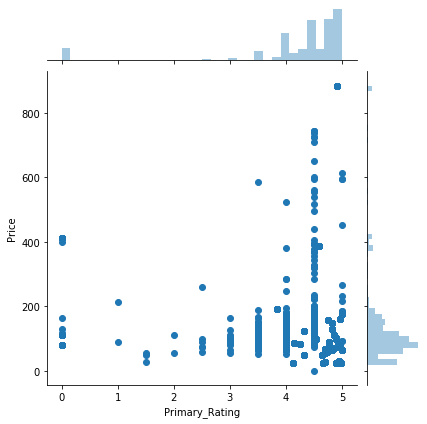

In [18]:
clean_df = load('cleaned_combined_df.pkl')
sns.jointplot(x='Primary_Rating',y='Price',data=clean_df,kind='scatter')

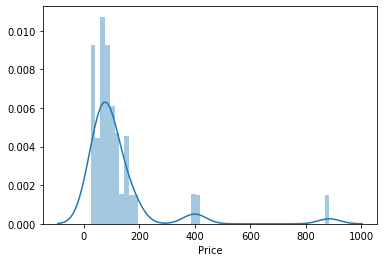

In [42]:
airbnb_listings = clean_df[clean_df['Airbnb_Or_Hotel'] == 'Airbnb']
sns.distplot(airbnb_listings['Price'])

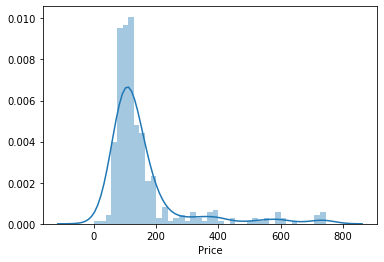

In [43]:
hotel_listings = clean_df[clean_df['Airbnb_Or_Hotel'] == 'Hotel']
sns.distplot(hotel_listings['Price'])

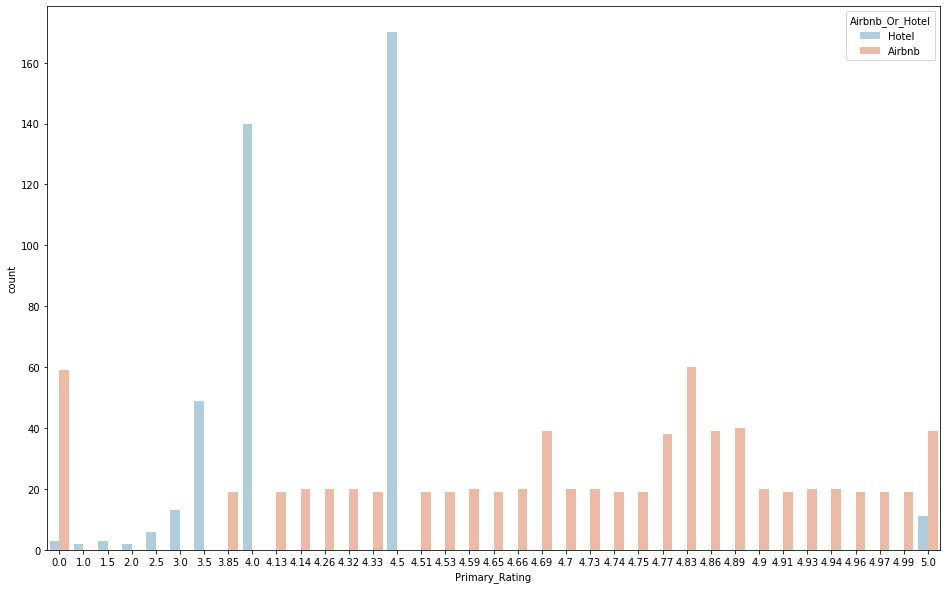

In [25]:
plt.figure(figsize=(16, 10))
sns.countplot(x='Primary_Rating',hue='Airbnb_Or_Hotel', data=clean_df,palette='RdBu_r')

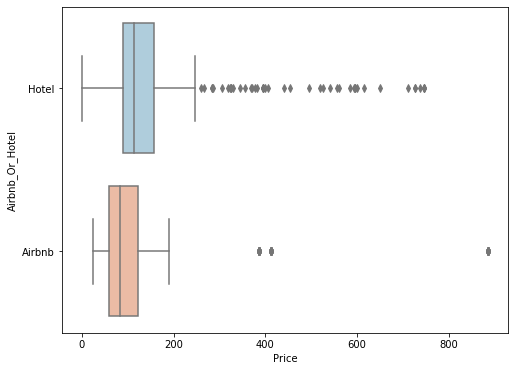

In [31]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Price", y="Airbnb_Or_Hotel", data=clean_df,palette='RdBu_r')

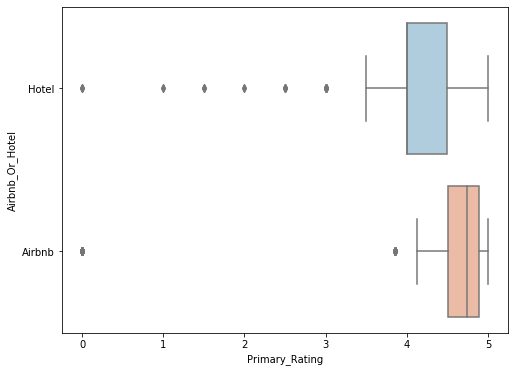

In [32]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Primary_Rating", y="Airbnb_Or_Hotel", data=clean_df,palette='RdBu_r')

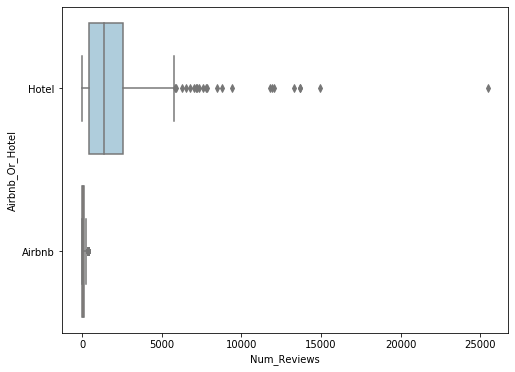

In [34]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Num_Reviews", y="Airbnb_Or_Hotel", data=clean_df,palette='RdBu_r')

In [46]:
clean_df['Num_Amenities'] = clean_df['Amenities'].apply(lambda x: len(x.split(' ')))

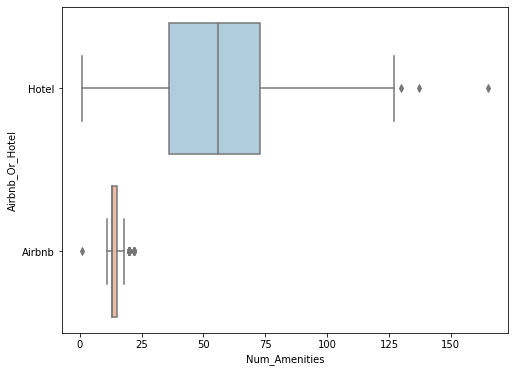

In [48]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Num_Amenities", y="Airbnb_Or_Hotel", data=clean_df,palette='RdBu_r')